In [23]:
from PIL import Image
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
train_path = 'oxfordflower17/train'
valid_path = 'oxfordflower17/val'
test_path = 'oxfordflower17/test'

In [25]:
#Take name of the classes in an array name class
classes = []
for i in range(1,18):
    classes.append("class_"+ str(i))
print(classes)


['class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11', 'class_12', 'class_13', 'class_14', 'class_15', 'class_16', 'class_17']


In [45]:
image_size = 128
datagen = ImageDataGenerator()

train_batches = datagen.flow_from_directory(train_path, 
                                                         target_size=(image_size,image_size), 
                                                         classes=classes,
                                                         batch_size=10)

valid_batches = datagen.flow_from_directory(valid_path,
                                                         target_size=(image_size,image_size), 
                                                         classes=classes, 
                                                         batch_size=5)

test_batches = datagen.flow_from_directory(test_path,
                                                        target_size=(image_size,image_size), 
                                                        classes=classes,
                                                        batch_size=4)

Found 976 images belonging to 17 classes.
Found 192 images belonging to 17 classes.
Found 192 images belonging to 17 classes.


In [46]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

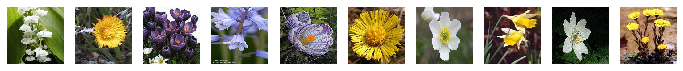

In [52]:
imgs, labels = next(train_batches)
plots(imgs)


In [48]:
num_classes = 17

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(image_size,image_size,3)))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax'))

model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
activation_26 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_27 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 63, 63, 64)        18496     
__________

In [50]:
model.fit_generator(train_batches, steps_per_epoch=400, 
                    validation_data=valid_batches, validation_steps=50, epochs=10, verbose=1)

Epoch 1/10


ValueError: Error when checking target: expected dense_28 to have shape (1,) but got array with shape (17,)